<a href="https://colab.research.google.com/github/natmonge/UCDPA_NataliaMongelos/blob/main/Data_Analytics_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# packages

# standard
import numpy as np
import pandas as pd
import requests
import urllib.parse

pd.set_option('mode.chained_assignment', None)
# plots
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# IMPORTING CONSUMER CONFIDENCE INDEX DATA

In [3]:
# IMPORT CCI DATA - ARGENTINA 
# wrapper to API call

def get_api_call(ids, **kwargs):
    API_BASE_URL = "https://apis.datos.gob.ar/series/api/"
    kwargs["ids"] = ",".join(ids)
    return "{}{}?{}".format(API_BASE_URL, "series", urllib.parse.urlencode(kwargs))
    
# convert the API call in CSV to a DataFrame using pandas
CCI_ARG = pd.read_csv(get_api_call(
    ["380.3_ICC_NACIONNAL_0_T_12"],
    format="csv", start_date=2015
))



#rename columns from spanish to English
CCI_ARG.rename(columns = {'indice_tiempo':'TIME','icc_nacional':'Value'}, inplace = True)


# Using DataFrame.insert() to add a column and populate with value = ARG
CCI_ARG.insert(0, "LOCATION",'ARG')

print (CCI_ARG)

   LOCATION        TIME      Value
0       ARG  2015-01-01  49.948658
1       ARG  2015-02-01  50.473072
2       ARG  2015-03-01  52.600952
3       ARG  2015-04-01  52.850000
4       ARG  2015-05-01  54.994553
..      ...         ...        ...
93      ARG  2022-10-01  35.649963
94      ARG  2022-11-01  35.146854
95      ARG  2022-12-01  35.905445
96      ARG  2023-01-01  38.520000
97      ARG  2023-02-01  36.180000

[98 rows x 3 columns]


In [4]:
# check for null values
CCI_ARG.isnull()

,LOCATION,TIME,Value
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
93,False,False,False
94,False,False,False
95,False,False,False
96,False,False,False


In [5]:
# IMPORT CCI DATA - OECD;UK;USA 
# import CSV file into DataFrame

path= "/content/drive/MyDrive/Data Sets/CCI-OECD 2015-2023.csv"

CCI_OECD= pd.read_csv(path)

CCI_OECD

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,OECD,CCI,AMPLITUD,LTRENDIDX,M,2015-01,100.46650,NaN
1,OECD,CCI,AMPLITUD,LTRENDIDX,M,2015-02,100.60350,NaN
2,OECD,CCI,AMPLITUD,LTRENDIDX,M,2015-03,100.66180,NaN
3,OECD,CCI,AMPLITUD,LTRENDIDX,M,2015-04,100.65990,NaN
4,OECD,CCI,AMPLITUD,LTRENDIDX,M,2015-05,100.59340,NaN
...,...,...,...,...,...,...,...,...
286,USA,CCI,AMPLITUD,LTRENDIDX,M,2022-09,96.54515,NaN
287,USA,CCI,AMPLITUD,LTRENDIDX,M,2022-10,96.64653,NaN
288,USA,CCI,AMPLITUD,LTRENDIDX,M,2022-11,96.69615,NaN
289,USA,CCI,AMPLITUD,LTRENDIDX,M,2022-12,96.91941,NaN


# PREPARING DATA

In [6]:
#CHECK FOR NULL VALUES
CCI_OECD.isnull()


,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...
286,False,False,False,False,False,False,False,True
287,False,False,False,False,False,False,False,True
288,False,False,False,False,False,False,False,True
289,False,False,False,False,False,False,False,True


In [7]:
#FILL NaN with Unknown
CCI_OECD['Flag Codes'].fillna('Unknown', inplace=True)
CCI_OECD.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,OECD,CCI,AMPLITUD,LTRENDIDX,M,2015-01,100.4665,Unknown
1,OECD,CCI,AMPLITUD,LTRENDIDX,M,2015-02,100.6035,Unknown
2,OECD,CCI,AMPLITUD,LTRENDIDX,M,2015-03,100.6618,Unknown
3,OECD,CCI,AMPLITUD,LTRENDIDX,M,2015-04,100.6599,Unknown
4,OECD,CCI,AMPLITUD,LTRENDIDX,M,2015-05,100.5934,Unknown


In [8]:
# CONCATENATE VERTICALLY CCI_ARG DATAFRAME to the CCI_OECD DATAFRAME AND ONLY GET MATCHING COLUMNS
ALL_CCI= pd.concat([CCI_OECD, CCI_ARG], ignore_index = True, join='inner')

print (ALL_CCI)

    LOCATION        TIME       Value
0       OECD     2015-01  100.466500
1       OECD     2015-02  100.603500
2       OECD     2015-03  100.661800
3       OECD     2015-04  100.659900
4       OECD     2015-05  100.593400
..       ...         ...         ...
384      ARG  2022-10-01   35.649963
385      ARG  2022-11-01   35.146854
386      ARG  2022-12-01   35.905445
387      ARG  2023-01-01   38.520000
388      ARG  2023-02-01   36.180000

[389 rows x 3 columns]


In [9]:
# CHECK IF MISSING DATA
ALL_CCI.isnull().sum()

LOCATION    0
TIME        0
Value       0
dtype: int64

In [10]:
ALL_CCI.info

<bound method DataFrame.info of     LOCATION        TIME       Value
0       OECD     2015-01  100.466500
1       OECD     2015-02  100.603500
2       OECD     2015-03  100.661800
3       OECD     2015-04  100.659900
4       OECD     2015-05  100.593400
..       ...         ...         ...
384      ARG  2022-10-01   35.649963
385      ARG  2022-11-01   35.146854
386      ARG  2022-12-01   35.905445
387      ARG  2023-01-01   38.520000
388      ARG  2023-02-01   36.180000

[389 rows x 3 columns]>

In [11]:
# CHECK FOR DUPLICATES
ALL_CCI=ALL_CCI.drop_duplicates()
ALL_CCI.shape

(389, 3)

In [21]:
# CLEAN "TIME" COLUMN

ALL_CCI['TIME'] = pd.to_datetime(ALL_CCI['TIME'], format='%Y-%m-%d')

print(ALL_CCI)

    LOCATION       TIME       Value
0       OECD 2015-01-01  100.466500
1       OECD 2015-02-01  100.603500
2       OECD 2015-03-01  100.661800
3       OECD 2015-04-01  100.659900
4       OECD 2015-05-01  100.593400
..       ...        ...         ...
384      ARG 2022-10-01   35.649963
385      ARG 2022-11-01   35.146854
386      ARG 2022-12-01   35.905445
387      ARG 2023-01-01   38.520000
388      ARG 2023-02-01   36.180000

[389 rows x 3 columns]


# ANALYSIS

In [22]:
# Customised Function to check MINIMUM VALUE in a Data Frame

def information(df):
  minValue= df['Value'].min()
  maxValue = df['Value'].max()

  print("The minimum value in column 'Value':" , minValue)
  print ("The maximum value in column 'Value':" , maxValue)


 

In [25]:
#Split ALL_CCI by LOCATION  and setting a time range using query on multiple conditions. 
#Set Index to Time


ARG_CCI = ALL_CCI.query('LOCATION=="ARG" and TIME <"2023-01-31"')

print(ARG_CCI)
information(ARG_CCI)

USA_CCI = ALL_CCI.query('LOCATION=="USA" and TIME < "2023-01-31"')

print(USA_CCI)

#Use customized funtion: "information"
information (USA_CCI)

    LOCATION       TIME      Value
291      ARG 2015-01-01  49.948658
292      ARG 2015-02-01  50.473072
293      ARG 2015-03-01  52.600952
294      ARG 2015-04-01  52.850000
295      ARG 2015-05-01  54.994553
..       ...        ...        ...
383      ARG 2022-09-01  37.189381
384      ARG 2022-10-01  35.649963
385      ARG 2022-11-01  35.146854
386      ARG 2022-12-01  35.905445
387      ARG 2023-01-01  38.520000

[97 rows x 3 columns]
The minimum value in column 'Value': 32.097534
The maximum value in column 'Value': 60.350544
    LOCATION       TIME      Value
194      USA 2015-01-01  101.14310
195      USA 2015-02-01  101.14540
196      USA 2015-03-01  101.04600
197      USA 2015-04-01  100.98960
198      USA 2015-05-01  100.90680
..       ...        ...        ...
286      USA 2022-09-01   96.54515
287      USA 2022-10-01   96.64653
288      USA 2022-11-01   96.69615
289      USA 2022-12-01   96.91941
290      USA 2023-01-01   97.29351

[97 rows x 3 columns]
The minimum value in

In [32]:
# Loop to get the Average CCI  value for ARGENTINA per year

mean_dict={}

for index, row in ARG_CCI.iterrows():
    year=row['TIME'].year
    if year in mean_dict:
      mean_dict[year].append(row["Value"])
    else:
      mean_dict[year] = [row['Value']]

result_ARG={}

for year, values in mean_dict.items():
  result_ARG[year]= sum(values)/len(values)

print("The Average CCI value for ARGENTINA per year is ':", result_ARG)

# Loop to get the Average CCI  value for USA per year

mean_dict1={}

for index, row in USA_CCI.iterrows():
    year=row['TIME'].year
    if year in mean_dict1:
      mean_dict1[year].append(row["Value"])
    else:
      mean_dict1[year] = [row['Value']]

result_USA={}

for year, values in mean_dict1.items():
  result_USA[year]= sum(values)/len(values)

print("The Average CCI value for USA per year is ':", result_USA)


The Average CCI value for ARGENTINA per year is ': {2015: 54.62046358333333, 2016: 45.17746991666666, 2017: 45.55053422222222, 2018: 37.65766675, 2019: 39.25011799999999, 2020: 40.2486445, 2021: 37.948486, 2022: 36.939911, 2023: 38.52}
The Average CCI value for USA per year is ': {2015: 100.81016666666666, 2016: 100.69175833333334, 2017: 101.28965, 2018: 101.45858333333332, 2019: 101.23385, 2020: 99.41663666666665, 2021: 98.97456416666665, 2022: 96.72737666666666, 2023: 97.29351}


In [34]:
# Numpy to get Average CCI value for Argentina for period 2015-2023

Average_ARG = ARG_CCI["Value"] 
np_Average_ARG=np.array(Average_ARG)
Average_ARG_mean=np.mean(np_Average_ARG)
print ("The Average CCI value for Argentina FOR THE PERIOD JAN 2015-JAN 2023 is':" , Average_ARG_mean)


The Average CCI value for Argentina FOR THE PERIOD JAN 2015-JAN 2023 is': 42.13648997594501


In [36]:
# SET INDEX 
ARG_CCI.set_index('TIME', inplace=True)
USA_CCI.set_index('TIME', inplace=True)

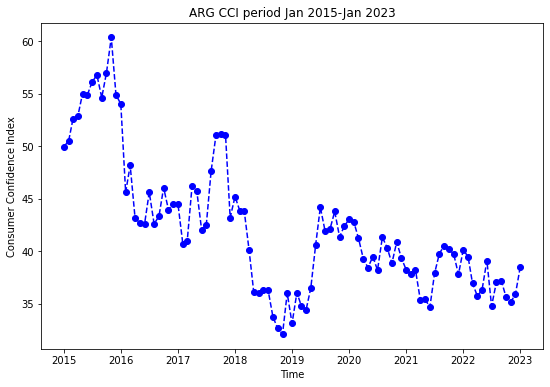

In [37]:
# Visualization using Matplotlib - ARGENTINA CCI FOR PERIOD JAN 2015-JAN 2023

plt.rcParams['figure.figsize'] = (9, 6)

fig, ax=plt.subplots()

ax.plot(ARG_CCI.index, ARG_CCI["Value"], marker="o", linestyle="--", color="b")
ax.set_xlabel("Time")
ax.set_ylabel("Consumer Confidence Index")
ax.set_title ("ARG CCI period Jan 2015-Jan 2023")

plt.show()

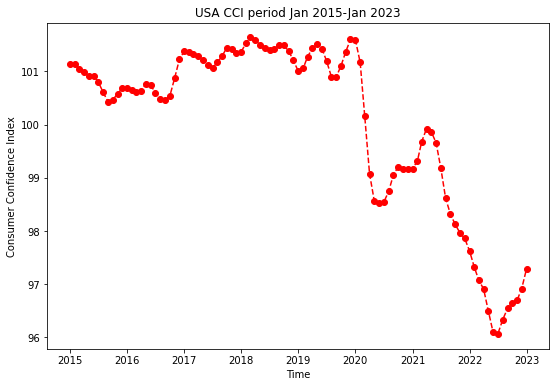

In [38]:
# Visualization using Matplotlib - USA CCI FOR PERIOD JAN 2015-JAN 2023

plt.rcParams['figure.figsize'] = (9, 6)
fig, ax=plt.subplots()

ax.plot(USA_CCI.index, USA_CCI["Value"], marker="o", linestyle="--", color="r")
ax.set_xlabel("Time")
ax.set_ylabel("Consumer Confidence Index")
ax.set_title ("USA CCI period Jan 2015-Jan 2023")

plt.show()

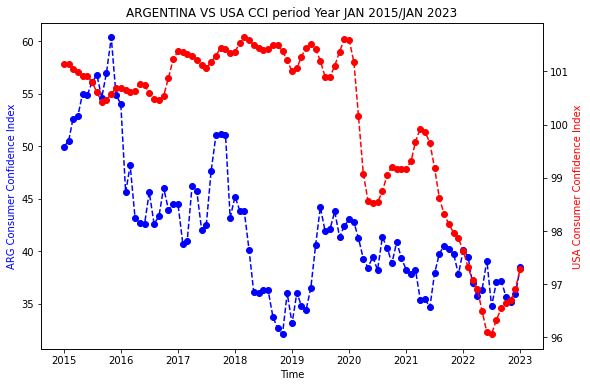

In [39]:
# Visualization using Matplotlib - Plotting time series with different variables
plt.rcParams['figure.figsize'] = (9, 6)

fig, ax=plt.subplots()
ax.plot(ARG_CCI.index, ARG_CCI["Value"], marker="o", linestyle="--", color="b")
ax.set_xlabel("Time")
ax.set_ylabel("ARG Consumer Confidence Index", color='blue')
ax2 = ax.twinx()
ax2.plot(USA_CCI.index, USA_CCI["Value"], marker="o", linestyle="--", color="r")
ax2.set_ylabel("USA Consumer Confidence Index", color='red')

ax.set_title ("ARGENTINA VS USA CCI period Year JAN 2015/JAN 2023")
plt.show()

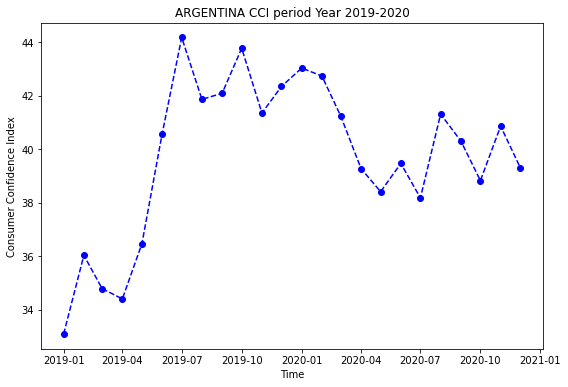

In [75]:
#zooming on ARG Period 2019-2020 BY SLICING INTO THE DATAFRAME
plt.rcParams['figure.figsize'] = (9, 6)
nineteen = ARG_CCI["2019-01-01":"2020-12-31"]
fig, ax=plt.subplots()
ax.plot(nineteen.index, nineteen["Value"], marker="o", linestyle="--", color="b")
ax.set_xlabel("Time")
ax.set_ylabel("Consumer Confidence Index")
ax.set_title ("ARGENTINA CCI period Year 2019-2020")
plt.show()

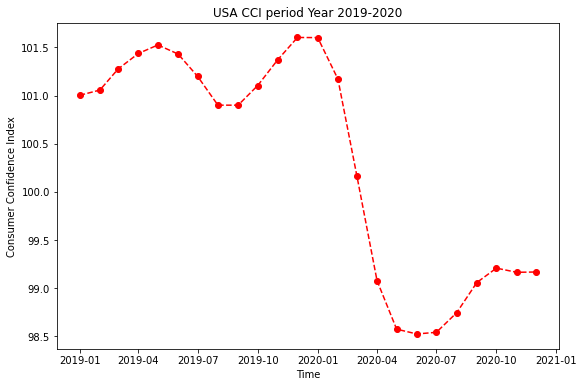

In [13]:
#zooming on USA Period 2019-2020 BY SLICING INTO THE DATAFRAME
plt.rcParams['figure.figsize'] = (9, 6)
nineteenusa = USA_CCI["2019-01-01":"2020-12-31"]
fig, ax=plt.subplots()
ax.plot(nineteenusa.index, nineteenusa["Value"], marker="o", linestyle="--", color="r")
ax.set_xlabel("Time")
ax.set_ylabel("Consumer Confidence Index")
ax.set_title ("USA CCI period Year 2019-2020")
plt.show()

# CALCULATING DIFFERENCES

In [35]:
#splitting the table by LOCATION and setting a time range using query on multiple conditions. Adding 2 columns ONE WITH ABSOLUTE VALUES
ARG_CCI1 = ALL_CCI.query('LOCATION=="ARG" and TIME <"2020-12-31" and TIME >= "2018-12-01"')
ARG_CCI1.set_index('TIME', inplace=True)
ARG_CCI1['CHANGE']=ARG_CCI1['Value'].diff()
ARG_CCI1['PCT_CHANGE']=ARG_CCI1['Value'].pct_change()
ARG_CCI1['PCT_CHANGE_ABS']=ARG_CCI1.PCT_CHANGE.abs()
print(ARG_CCI1)


USA_CCI1 = ALL_CCI.query('LOCATION=="USA" and TIME <"2020-12-31" and TIME >= "2018-12-01"')
USA_CCI1.set_index('TIME', inplace=True)
USA_CCI1['CHANGE']=USA_CCI1['Value'].diff()
USA_CCI1['PCT_CHANGE']=USA_CCI1['Value'].pct_change()
USA_CCI1['PCT_CHANGE_ABS']=USA_CCI1.PCT_CHANGE.abs()


print(USA_CCI1)

           LOCATION      Value    CHANGE  PCT_CHANGE  PCT_CHANGE_ABS
TIME                                                                
2018-12-01      ARG  35.989628       NaN         NaN             NaN
2019-01-01      ARG  33.101078 -2.888550   -0.080261        0.080261
2019-02-01      ARG  36.039967  2.938889    0.088785        0.088785
2019-03-01      ARG  34.794621 -1.245346   -0.034555        0.034555
2019-04-01      ARG  34.411144 -0.383477   -0.011021        0.011021
2019-05-01      ARG  36.472500  2.061356    0.059904        0.059904
2019-06-01      ARG  40.574234  4.101734    0.112461        0.112461
2019-07-01      ARG  44.176544  3.602310    0.088783        0.088783
2019-08-01      ARG  41.862835 -2.313709   -0.052374        0.052374
2019-09-01      ARG  42.093285  0.230450    0.005505        0.005505
2019-10-01      ARG  43.772411  1.679126    0.039891        0.039891
2019-11-01      ARG  41.354538 -2.417873   -0.055237        0.055237
2019-12-01      ARG  42.348259  0.

In [36]:
# MERGE USA AND ARG , ADD SUFFIXES AND REMOVE UNWANTED COLUMNS AND THE FIRST ROW WITH NAN VALUES
USA_ARG=pd.merge_ordered(ARG_CCI1, USA_CCI1, on='TIME', suffixes =('_ARG', '_USA'))
USA_ARG=USA_ARG.loc[1:,("TIME", "CHANGE_ARG","CHANGE_USA", "PCT_CHANGE_ARG", "PCT_CHANGE_USA")]
USA_ARG.set_index('TIME', inplace=True)
print(USA_ARG)

            CHANGE_ARG  CHANGE_USA  PCT_CHANGE_ARG  PCT_CHANGE_USA
TIME                                                              
2019-01-01   -2.888550    -0.20530       -0.080261   -2.028504e-03
2019-02-01    2.938889     0.05450        0.088785    5.395917e-04
2019-03-01   -1.245346     0.21920       -0.034555    2.169077e-03
2019-04-01   -0.383477     0.16070       -0.011021    1.586753e-03
2019-05-01    2.061356     0.08840        0.059904    8.714795e-04
2019-06-01    4.101734    -0.09430        0.112461   -9.288343e-04
2019-07-01    3.602310    -0.23310        0.088783   -2.298119e-03
2019-08-01   -2.313709    -0.29770       -0.052374   -2.941766e-03
2019-09-01    0.230450    -0.00010        0.005505   -9.910803e-07
2019-10-01    1.679126     0.20400        0.039891    2.021806e-03
2019-11-01   -2.417873     0.27010       -0.055237    2.671509e-03
2019-12-01    0.993721     0.22900        0.024029    2.258962e-03
2020-01-01    0.686241    -0.00160        0.016205   -1.574757

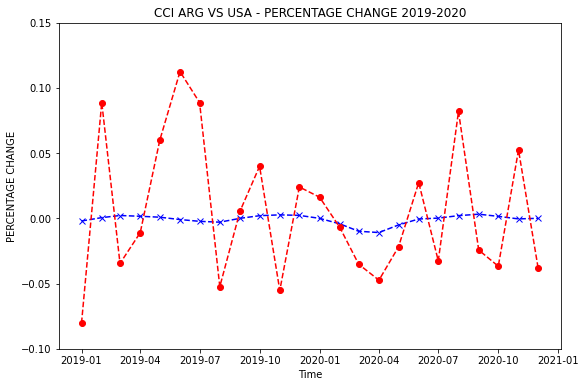

In [16]:
#Compare CCI PERCENTAGE CHANGE BETWEEN ARG AND US FOR PERIOD 2019-2020. 
#Change y axis scale to make graph more meaningful
plt.rcParams['figure.figsize'] = (9, 6)

fig, ax=plt.subplots()

ax.plot(USA_ARG.index, USA_ARG["PCT_CHANGE_USA"], marker="x", linestyle="--", color="b")
ax.plot(USA_ARG.index, USA_ARG["PCT_CHANGE_ARG"], marker="o", linestyle="--", color="r")
ax.set_xlabel("Time")
ax.set_ylabel("PERCENTAGE CHANGE")
ax.set_title ("CCI ARG VS USA - PERCENTAGE CHANGE 2019-2020")
plt.ylim(bottom=-0.10, top=0.15)
plt.show()

In [17]:
# MERGE USA AND ARG ABSOLUTE VALUES

USA_ARG_ABS=pd.merge_ordered(ARG_CCI1, USA_CCI1, on='TIME', suffixes =('_ARG', '_USA'))
USA_ARG_ABS=USA_ARG_ABS.loc[1:,("TIME", "CHANGE_ARG","CHANGE_USA", "PCT_CHANGE_ABS_ARG", "PCT_CHANGE_ABS_USA")]
USA_ARG_ABS.set_index('TIME', inplace=True)

USA_ARG_ABS.head()

,CHANGE_ARG,CHANGE_USA,PCT_CHANGE_ABS_ARG,PCT_CHANGE_ABS_USA
TIME,,,,
2019-01-01,-2.888550,-0.2053,0.080261,0.002029
2019-02-01,2.938889,0.0545,0.088785,0.000540
2019-03-01,-1.245346,0.2192,0.034555,0.002169
2019-04-01,-0.383477,0.1607,0.011021,0.001587
2019-05-01,2.061356,0.0884,0.059904,0.000871


In [18]:
#CHECK IF ARGENTINA EVER HAD A LOWER PERCENTAGE CHANGE THAN THE USA DURING THE PERIOD 2019-2020. USE OF BOOLEAN
USA_ARG_ABS['ARG LOWER ABS PCT CHANGE']=np.where(USA_ARG_ABS['PCT_CHANGE_ABS_USA'] > USA_ARG_ABS['PCT_CHANGE_ABS_ARG'], True, False)

USA_ARG_ABS.head(100)

,CHANGE_ARG,CHANGE_USA,PCT_CHANGE_ABS_ARG,PCT_CHANGE_ABS_USA,ARG LOWER ABS PCT CHANGE
TIME,,,,,
2019-01-01,-2.888550,-0.20530,0.080261,2.028504e-03,False
2019-02-01,2.938889,0.05450,0.088785,5.395917e-04,False
2019-03-01,-1.245346,0.21920,0.034555,2.169077e-03,False
2019-04-01,-0.383477,0.16070,0.011021,1.586753e-03,False
2019-05-01,2.061356,0.08840,0.059904,8.714795e-04,False
2019-06-01,4.101734,-0.09430,0.112461,9.288343e-04,False
2019-07-01,3.602310,-0.23310,0.088783,2.298119e-03,False
2019-08-01,-2.313709,-0.29770,0.052374,2.941766e-03,False
2019-09-01,0.230450,-0.00010,0.005505,9.910803e-07,False


In [19]:
#splitting the table by LOCATION WITH NO TIME RANGE. Adding 2 columns ONE WITH ABSOLUTE VALUES
ARG_CCI2 = ALL_CCI.query('LOCATION=="ARG"')
ARG_CCI2.set_index('TIME', inplace=True)
ARG_CCI2['CHANGE']=ARG_CCI2['Value'].diff()
ARG_CCI2['PCT_CHANGE']=ARG_CCI2['Value'].pct_change()
ARG_CCI2['PCT_CHANGE_ABS']=ARG_CCI2.PCT_CHANGE.abs()



OECD_CCI = ALL_CCI.query('LOCATION=="OECD"')
OECD_CCI.set_index('TIME', inplace=True)
OECD_CCI['CHANGE']=OECD_CCI['Value'].diff()
OECD_CCI['PCT_CHANGE']=OECD_CCI['Value'].pct_change()
OECD_CCI['PCT_CHANGE_ABS']=OECD_CCI.PCT_CHANGE.abs()




<ipython-input-19-b16c50047eda>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ARG_CCI2['CHANGE']=ARG_CCI2['Value'].diff()
<ipython-input-19-b16c50047eda>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ARG_CCI2['PCT_CHANGE']=ARG_CCI2['Value'].pct_change()
<ipython-input-19-b16c50047eda>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

In [20]:
# MERGE OECD AND ARG ABSOLUTE VALUES

OECD_ARG_ABS=pd.merge_ordered(ARG_CCI2, OECD_CCI, on='TIME', suffixes =('_ARG', '_OECD'))
OECD_ARG_ABS=OECD_ARG_ABS.loc[0:,("TIME", "CHANGE_ARG","CHANGE_OECD", "PCT_CHANGE_ABS_ARG", "PCT_CHANGE_ABS_OECD")]

OECD_ARG_ABS.set_index('TIME', inplace=True)

OECD_ARG_ABS.head(200)

,CHANGE_ARG,CHANGE_OECD,PCT_CHANGE_ABS_ARG,PCT_CHANGE_ABS_OECD
TIME,,,,
2015-01-01,NaN,NaN,NaN,NaN
2015-02-01,0.524414,0.13700,0.010499,0.001364
2015-03-01,2.127880,0.05830,0.042159,0.000580
2015-04-01,0.249048,-0.00190,0.004735,0.000019
2015-05-01,2.144553,-0.06650,0.040578,0.000661
...,...,...,...,...
2022-10-01,-1.539418,0.07403,0.041394,0.000767
2022-11-01,-0.503109,0.16456,0.014112,0.001703
2022-12-01,0.758591,0.27823,0.021583,0.002875


In [21]:
#DROP NaN
OECD_ARG_ABS2=OECD_ARG_ABS.dropna(axis=0)

OECD_ARG_ABS2.head()


,CHANGE_ARG,CHANGE_OECD,PCT_CHANGE_ABS_ARG,PCT_CHANGE_ABS_OECD
TIME,,,,
2015-02-01,0.524414,0.1370,0.010499,0.001364
2015-03-01,2.127880,0.0583,0.042159,0.000580
2015-04-01,0.249048,-0.0019,0.004735,0.000019
2015-05-01,2.144553,-0.0665,0.040578,0.000661
2015-06-01,-0.113499,-0.0507,0.002064,0.000504


In [22]:
#CHECK IF ARGENTINA EVER HAD A LOWER ABSOLUTE PERCENTAGE CHANGE THAN THE OECD . USE OF BOOLEAN
OECD_ARG_ABS2['ARG LOWER ABS PCT CHANGE']=np.where(OECD_ARG_ABS2['PCT_CHANGE_ABS_OECD'] > OECD_ARG_ABS2['PCT_CHANGE_ABS_ARG'], True, False)

result=OECD_ARG_ABS2[OECD_ARG_ABS2['ARG LOWER ABS PCT CHANGE']== True]
result.head()

<ipython-input-22-1645de24e595>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  OECD_ARG_ABS2['ARG LOWER ABS PCT CHANGE']=np.where(OECD_ARG_ABS2['PCT_CHANGE_ABS_OECD'] > OECD_ARG_ABS2['PCT_CHANGE_ABS_ARG'], True, False)


,CHANGE_ARG,CHANGE_OECD,PCT_CHANGE_ABS_ARG,PCT_CHANGE_ABS_OECD,ARG LOWER ABS PCT CHANGE
TIME,,,,,
2017-11-01,-0.005276,0.0245,0.000103,0.000242,True
2018-08-01,-0.004959,-0.0558,0.000137,0.000551,True


In [23]:
# CREATING A FUNCTION THAT PLOTS TIME SERIES

def plot_timeseries(axes, x, y, color, xlabel, ylabel):
  axes.plot(x, y, color=color)
  axes.set_xlabel(xlabel)
  axes.set_ylabel(ylabel, color=color)
  axes.tick_params('y', colors=color)

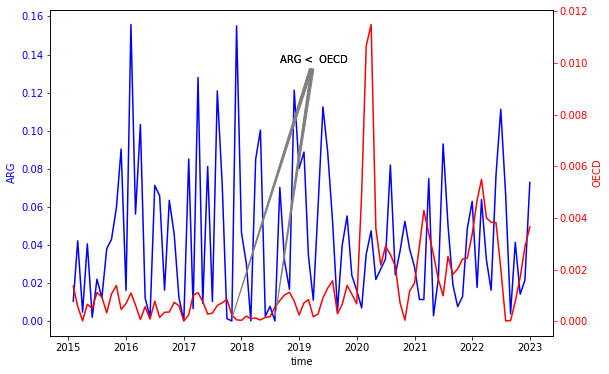

In [24]:
# DATA VISUALIZATION WITH ANNOTATIONS, TEXT POSITIONING AND ARROWS
fig, ax=plt.subplots()
plot_timeseries(ax, OECD_ARG_ABS2.index, OECD_ARG_ABS2['PCT_CHANGE_ABS_ARG'], 'blue', 'time', 'ARG')
ax2=ax.twinx()
plot_timeseries(ax2,OECD_ARG_ABS2.index, OECD_ARG_ABS2['PCT_CHANGE_ABS_OECD'], 'red', 'time', 'OECD') 
ax2.annotate("ARG <  OECD", 
             xy=(pd.Timestamp("2017-11-01"), 0.000103),
             xytext=(pd.Timestamp("2018-09-01"), 0.01),
             arrowprops={"arrowstyle":"wedge", "color":"gray"})
ax2.annotate("ARG <  OECD", 
             xy=(pd.Timestamp("2018-08-01"), 0.000137),
             xytext=(pd.Timestamp("2018-09-01"), 0.01),
             arrowprops={"arrowstyle":"wedge", "color":"gray"})

plt.show()